<a href="https://colab.research.google.com/github/jimmy-io/Insight_project/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn import preprocessing
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
%cd /content/drive/My\ Drive/Insight/Project/fashionbeans/

/content/drive/My Drive/Insight/Project/fashionbeans


In [5]:
mf_features =pd.read_csv('features_pd.csv')

mf_features.head()


,names,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,2+28-masked-2.jpg,0.292963,0.000234,0.349291,0.225390,0.552341,0.384406,1.106968,0.289374,0.059056,0.224487,0.330342,0.134458,0.036309,0.361801,0.529934,0.642112,0.349378,0.105639,0.592969,0.336199,0.001085,0.059341,0.057119,0.364274,0.052361,0.329709,0.018186,0.026867,0.370087,0.704868,0.040456,0.401509,0.465517,0.598697,0.062692,0.402291,0.105194,0.317435,0.583350,...,0.041303,0.008700,0.322823,0.217256,1.083543,0.810519,0.128813,0.038518,0.000000,0.089653,0.095209,1.648590,0.271067,0.484049,0.133044,0.000000,0.098972,0.321015,0.252707,1.484192,0.094104,0.093860,0.404872,0.543994,0.219630,0.377523,0.009319,0.129382,0.559762,0.080779,1.090021,0.008611,0.376602,1.211630,0.030006,0.038619,0.931040,0.069758,0.242599,0.012855
1,2+28-masked-3.jpg,0.024082,0.611249,0.328074,0.344005,0.578795,0.010764,0.416483,0.846321,0.147201,0.926255,0.076152,0.046123,0.070261,0.325442,0.324802,0.112189,0.069548,0.891315,0.209690,0.946106,0.559605,0.795091,1.290967,0.242937,0.024457,0.922186,0.165982,0.033686,0.032118,0.405493,0.170889,0.264947,0.383641,0.618006,0.042353,0.058144,0.008606,0.332442,0.783173,...,0.144593,0.019579,0.373311,1.306583,0.097226,0.000000,0.074721,0.425302,0.000000,0.000000,0.178219,1.063774,0.114380,0.080498,0.140569,0.978823,0.579694,0.482947,0.000000,0.371818,0.012903,1.874271,0.000000,0.000000,0.313616,0.036154,0.893880,0.008801,0.726768,0.296521,0.443975,2.244174,0.000000,1.733019,1.666897,0.133471,1.921054,0.669140,0.558867,0.006132
2,2+28-masked-4.jpg,0.065327,0.026326,0.309895,0.246753,0.263633,0.005091,0.309511,0.124351,0.011416,0.029321,0.000000,0.075812,0.003912,0.728393,0.436652,0.505246,0.185159,0.133779,0.327234,0.651455,0.017709,0.110072,0.022143,0.000000,0.012508,0.101200,0.030755,0.016910,0.220965,0.223269,0.090566,0.281175,0.000000,0.475001,0.075413,0.173734,0.007706,0.045286,0.136465,...,0.104514,0.154630,0.931152,0.051203,0.300727,0.038505,0.079314,0.005289,0.198813,0.058984,0.040934,0.858874,0.053318,0.691104,0.137561,0.062760,0.281144,0.377570,0.000000,0.055771,0.137141,0.044059,0.834085,0.515534,0.008071,0.001318,0.155444,0.249397,0.238706,0.009445,0.004061,0.696760,0.053226,0.728933,0.170821,0.007268,0.349960,0.035479,0.000000,0.002120
3,2+28-masked-5.jpg,0.071181,0.089520,0.271692,0.243964,0.320480,0.000000,0.276896,0.163015,0.023578,0.086659,0.004338,0.067762,0.001968,0.574487,0.556710,0.557137,0.179297,0.199595,0.278228,0.592763,0.019572,0.151617,0.007185,0.000000,0.021576,0.243509,0.037609,0.040244,0.146192,0.147188,0.093517,0.228476,0.038158,0.419932,0.159094,0.156568,0.033225,0.000000,0.142564,...,0.150572,0.041128,0.789660,0.078335,0.255532,0.018525,0.005324,0.068639,0.124828,0.000000,0.006341,0.875554,0.050566,0.686547,0.185302,0.131241,0.237503,0.096694,0.000000,0.136010,0.068106,0.180759,0.721657,0.455660,0.000000,0.229321,0.130974,0.167529,0.118610,0.047353,0.098701,0.644625,0.060228,0.703980,0.203200,0.021226,0.503772,0.008741,0.000000,0.139069
4,2+28-masked-6.jpg,0.040924,0.000000,0.205713,0.127775,0.066336,0.114027,0.349052,0.154090,0.017857,0.353766,0.157807,0.120353,0.000000,0.637400,0.800324,1.185015,0.103040,0.225700,0.002241,0.990746,0.061340,0.087463,0.367005,0.263966,0.188313,0.119551,0.011481,0.140720,0.054004,0.364359,0.926769,0.166130,0.221353,0.098845,0.626729,0.031713,0.060448,0.294438,0.487728,...,0.499152,1.462144,1.480201,0.766618,0.061104,0.020337,0.287790,0.084297,0.317540,0.006769,0.320908,0.269400,0.145094,1.094262,0.098124,0.547979,0.000000,0.381243,0.055772,0.810716,1.638107,0.138410,0.009761,0.098520,0.000000,0.243885,0.000000,0.369629,0.058001,0.226073,0.018482,1.325999,0.055404,0.834092,1.319260,0.364063,0.133532,0.070928,0.267542,0.080662


In [6]:
mf_features.set_index('names', drop = True,inplace = True)
mf_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2+28-masked-2.jpg,0.292963,0.000234,0.349291,0.225390,0.552341,0.384406,1.106968,0.289374,0.059056,0.224487,0.330342,0.134458,0.036309,0.361801,0.529934,0.642112,0.349378,0.105639,0.592969,0.336199,0.001085,0.059341,0.057119,0.364274,0.052361,0.329709,0.018186,0.026867,0.370087,0.704868,0.040456,0.401509,0.465517,0.598697,0.062692,0.402291,0.105194,0.317435,0.583350,0.333772,...,0.041303,0.008700,0.322823,0.217256,1.083543,0.810519,0.128813,0.038518,0.000000,0.089653,0.095209,1.648590,0.271067,0.484049,0.133044,0.000000,0.098972,0.321015,0.252707,1.484192,0.094104,0.093860,0.404872,0.543994,0.219630,0.377523,0.009319,0.129382,0.559762,0.080779,1.090021,0.008611,0.376602,1.211630,0.030006,0.038619,0.931040,0.069758,0.242599,0.012855
2+28-masked-3.jpg,0.024082,0.611249,0.328074,0.344005,0.578795,0.010764,0.416483,0.846321,0.147201,0.926255,0.076152,0.046123,0.070261,0.325442,0.324802,0.112189,0.069548,0.891315,0.209690,0.946106,0.559605,0.795091,1.290967,0.242937,0.024457,0.922186,0.165982,0.033686,0.032118,0.405493,0.170889,0.264947,0.383641,0.618006,0.042353,0.058144,0.008606,0.332442,0.783173,0.671515,...,0.144593,0.019579,0.373311,1.306583,0.097226,0.000000,0.074721,0.425302,0.000000,0.000000,0.178219,1.063774,0.114380,0.080498,0.140569,0.978823,0.579694,0.482947,0.000000,0.371818,0.012903,1.874271,0.000000,0.000000,0.313616,0.036154,0.893880,0.008801,0.726768,0.296521,0.443975,2.244174,0.000000,1.733019,1.666897,0.133471,1.921054,0.669140,0.558867,0.006132
2+28-masked-4.jpg,0.065327,0.026326,0.309895,0.246753,0.263633,0.005091,0.309511,0.124351,0.011416,0.029321,0.000000,0.075812,0.003912,0.728393,0.436652,0.505246,0.185159,0.133779,0.327234,0.651455,0.017709,0.110072,0.022143,0.000000,0.012508,0.101200,0.030755,0.016910,0.220965,0.223269,0.090566,0.281175,0.000000,0.475001,0.075413,0.173734,0.007706,0.045286,0.136465,0.329454,...,0.104514,0.154630,0.931152,0.051203,0.300727,0.038505,0.079314,0.005289,0.198813,0.058984,0.040934,0.858874,0.053318,0.691104,0.137561,0.062760,0.281144,0.377570,0.000000,0.055771,0.137141,0.044059,0.834085,0.515534,0.008071,0.001318,0.155444,0.249397,0.238706,0.009445,0.004061,0.696760,0.053226,0.728933,0.170821,0.007268,0.349960,0.035479,0.000000,0.002120
2+28-masked-5.jpg,0.071181,0.089520,0.271692,0.243964,0.320480,0.000000,0.276896,0.163015,0.023578,0.086659,0.004338,0.067762,0.001968,0.574487,0.556710,0.557137,0.179297,0.199595,0.278228,0.592763,0.019572,0.151617,0.007185,0.000000,0.021576,0.243509,0.037609,0.040244,0.146192,0.147188,0.093517,0.228476,0.038158,0.419932,0.159094,0.156568,0.033225,0.000000,0.142564,0.162718,...,0.150572,0.041128,0.789660,0.078335,0.255532,0.018525,0.005324,0.068639,0.124828,0.000000,0.006341,0.875554,0.050566,0.686547,0.185302,0.131241,0.237503,0.096694,0.000000,0.136010,0.068106,0.180759,0.721657,0.455660,0.000000,0.229321,0.130974,0.167529,0.118610,0.047353,0.098701,0.644625,0.060228,0.703980,0.203200,0.021226,0.503772,0.008741,0.000000,0.139069
2+28-masked-6.jpg,0.040924,0.000000,0.205713,0.127775,0.066336,0.114027,0.349052,0.154090,0.017857,0.353766,0.157807,0.120353,0.000000,0.637400,0.800324,1.185015,0.103040,0.225700,0.002241,0.990746,0.061340,0.087463,0.367005,0.263966,0.188313,0.119551,0.011481,0.140720,0.054004,0.364359,0.926769,0.166130,0.221353,0.098845,0.626729,0.031713,0.060448,0.294438,0.487728,0.016633,...,0.499152,1.462144,1.480201,0.766618,0.061104,0.020337,0.287790,0.084297,0.317540,0.006769,0.320908,0.269400,0.145094,1.094262,0.098124,0.547979,0.000000,0.381243,0.055772,0.810716,1.638107,0.138410,0.009761,0.098520,0.000000,0.243885,0.000000,0.369

In [8]:
### Silhouette Coefficient


mf_features_norm = preprocessing.normalize(mf_features)

kmeans = KMeans(n_clusters=2, random_state=0).fit(mf_features_norm)
labels = kmeans.labels_
metrics.silhouette_score(mf_features_norm, labels, metric='euclidean')

KeyboardInterrupt: ignored

In [7]:
###Elbow




scores = [KMeans(n_clusters=i+2).fit(mf_features_norm).inertia_ 
          for i in range(15)]
fig = plt.figure()
ax = plt.axes()


ax.plot(scores)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

NameError: ignored

In [12]:
## 2 component PCA


mf_features_norm = preprocessing.normalize(mf_features)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mf_features_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf

,principal component 1,principal component 2
0,0.058629,0.528581
1,-0.366648,-0.128512
2,0.291291,-0.034369
3,0.284082,0.018959
4,-0.205814,0.081622
...,...,...
12001,0.247601,-0.060286
12002,-0.158530,0.130312
12003,-0.213059,0.088240
12004,0.131818,-0.009153


In [13]:
principalDf['names']=list(mf_features.index.values)
principalDf.set_index('names', drop=True, append=False, inplace=True)
principalDf

,principal component 1,principal component 2
names,,
2+28-masked-2.jpg,0.058629,0.528581
2+28-masked-3.jpg,-0.366648,-0.128512
2+28-masked-4.jpg,0.291291,-0.034369
2+28-masked-5.jpg,0.284082,0.018959
2+28-masked-6.jpg,-0.205814,0.081622
...,...,...
42+23-masked-2.jpg,0.247601,-0.060286
42+23-masked-3.jpg,-0.158530,0.130312
42+23-masked-4.jpg,-0.213059,0.088240


In [0]:
labels = principalDf.index

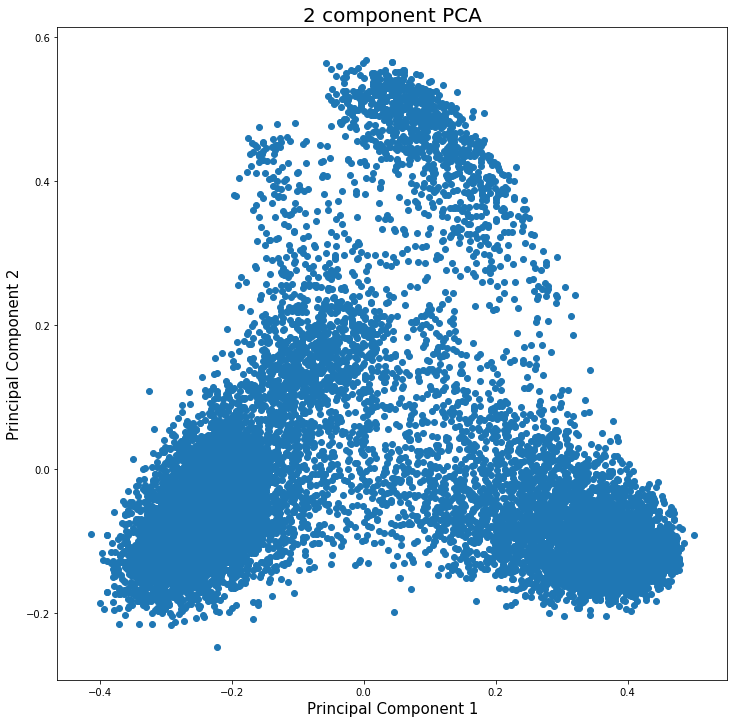

In [14]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['principal component 1'],
           principalDf['principal component 2']
          )


#for i, index in enumerate(labels):
    #ax.annotate(index, (principalDf.iloc[i][0], principalDf.iloc[i][1]))

In [40]:
# x and y given as array_like objects
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd



fig = go.Figure(data=go.Scatter(x=principalDf['principal component 1'],
                                y=principalDf['principal component 2'],
                                mode='markers',
                                text=principalDf.index)) # hover text goes here

fig.update_layout(title='2 component PCA',width=1000, height=800)

fig.show()

In [0]:
### User image 

model = InceptionV3(weights='imagenet', include_top=False)
#model.summary()

img = image.load_img('user_test.jpg', target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

user_feature = model.predict(img_data)

  
user_feature_np = np.array(user_feature)
user_feature_np = user_feature_np.flatten()
len(user_feature_np)

51200

In [0]:
user_feature_np.shape

(51200,)

In [0]:
user_feature_np = user_feature_np.reshape(1, -1)
print(user_feature_np.shape)

user_feature_norm = preprocessing.normalize(user_feature_np)
user_feature_norm = user_feature_norm.reshape(51200,)

print(user_feature_norm.shape)

(1, 51200)
(51200,)


In [0]:
user_feature_norm = pd.Series(user_feature_norm, index = mf_features.columns)
user_feature_norm

1        0.000000
2        0.000000
3        0.000000
4        0.000115
5        0.000000
6        0.000000
7        0.005152
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.010486
13       0.002857
14       0.006461
15       0.000733
16       0.001166
17       0.000000
18       0.000000
19       0.000000
20       0.003287
21       0.001424
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
30       0.000000
           ...   
51171    0.000000
51172    0.003622
51173    0.005072
51174    0.003170
51175    0.000000
51176    0.000000
51177    0.000000
51178    0.000000
51179    0.000000
51180    0.001006
51181    0.000000
51182    0.002397
51183    0.004913
51184    0.001448
51185    0.000000
51186    0.001084
51187    0.000685
51188    0.000000
51189    0.000574
51190    0.001797
51191    0.000000
51192    0.001619
51193    0.000000
51194    0.004058
51195    0

In [0]:
### combining test image with features dataframe 
#user_feature_norm = pd.Series(user_feature_norm)
#combo_features=

features_withtest = mf_features.append(user_feature_norm, ignore_index=True)
features_withtest

,1,2,3,4,5,6,7,8,9,10,...,51191,51192,51193,51194,51195,51196,51197,51198,51199,51200
0,0.234422,0.000000,1.748026,0.620096,0.000000,0.000000,0.000000,0.0,0.822041,0.000000,...,0.294337,0.395623,0.000000,0.000000,0.000000,0.000000,0.000000,2.107985,1.101410,1.631217
1,0.000000,0.000000,1.323125,0.000000,0.000000,1.099567,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.332609,0.691194,1.398327,1.517198,0.039111,0.000000,0.000000
2,0.542710,0.000000,1.229383,0.045002,0.248592,0.000000,0.000000,0.0,0.259325,0.000000,...,0.000000,2.165267,0.342934,1.738181,0.419735,0.000000,1.213607,0.000000,0.157842,0.118816
3,0.506075,0.000000,1.230318,0.096645,0.161257,0.000000,0.000000,0.0,0.209133,0.000000,...,0.000000,2.007596,0.651703,2.514235,0.630699,0.000000,1.454212,0.000000,0.509401,0.814658
4,0.000000,0.000000,0.901073,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.188878,0.659365,0.000000,2.267030,0.297415,0.664253,0.000000,0.540801,0.000000,0.000000
5,0.065777,0.000000,2.019639,0.465239,0.000000,0.000000,0.000000,0.0,0.512211,0.000000,...,0.000000,0.606243,0.000000,0.000000,0.000000,0.000000,0.507838,1.093417,0.000000,0.000000
6,0.449323,0.053422,1.356884,0.080267,0.122403,0.000000,0.000000,0.0,0.425781,0.000000,...,0.000000,1.075602,0.391050,1.718072,0.893010,0.000000,0.912859,0.485803,0.525844,0.000000
7,0.000000,0.000000,0.995878,0.000000,0.000000,0.162158,0.000000,0.0,0.000000,0.000000,...,0.281373,0.446176,0.059155,1.527486,1.216925,0.541671,0.000000,0.221180,0.352695,0.000000
8,0.532382,0.000000,1.166297,0.152533,0.210680,0.000000,0.000000,0.0,0.244519,0.000000,...,0.000000,1.669714,0.530869,1.095429,1.429394,0.046476,0.797676,1.353366,1.718610,0.000000
9,0.000000,0.000000,1.943289,0.737149,0.000000,0.000000,0.000000,0.0,0.144728,0.000000,...,2.820990,2.055924,0.000000,2.211786,1.084343,0.000000,0.000000,2.150824,0.000000,0.000000


In [0]:
s1 = pd.Series(['user'])
mf_pic_names = pd.concat([mf_pic_names, s1], axis = 0, ignore_index = False)
mf_pic_names

,0,1
1,NaN,masked_item-101.jpg
2,NaN,masked_item-201.jpg
3,NaN,masked_item-301.jpg
4,NaN,masked_item-403.jpg
5,NaN,masked_item-503.jpg
6,NaN,masked_item-102.jpg
7,NaN,masked_item-202.jpg
8,NaN,masked_item-302.jpg
9,NaN,masked_item-402.jpg
10,NaN,masked_item-103.jpg


In [0]:
mf_pic_names.drop(columns=[0], inplace = True)
mf_pic_names

,1
1,masked_item-101.jpg
2,masked_item-201.jpg
3,masked_item-301.jpg
4,masked_item-403.jpg
5,masked_item-503.jpg
6,masked_item-102.jpg
7,masked_item-202.jpg
8,masked_item-302.jpg
9,masked_item-402.jpg
10,masked_item-103.jpg


In [0]:
#mf_pic_names=mf_pic_names.reset_index()
#mf_pic_names.drop(columns=['index'], inplace = True)
#mf_pic_names.iloc[16][1]='User'
mf_pic_names

,1
0,masked_item-101.jpg
1,masked_item-201.jpg
2,masked_item-301.jpg
3,masked_item-403.jpg
4,masked_item-503.jpg
5,masked_item-102.jpg
6,masked_item-202.jpg
7,masked_item-302.jpg
8,masked_item-402.jpg
9,masked_item-103.jpg


In [0]:
features_withtest['name']=mf_pic_names[1].values
features_withtest.set_index('name', drop=True, append=False, inplace=True)
features_withtest

,1,2,3,4,5,6,7,8,9,10,...,51191,51192,51193,51194,51195,51196,51197,51198,51199,51200
name,,,,,,,,,,,,,,,,,,,,,
masked_item-101.jpg,0.234422,0.000000,1.748026,0.620096,0.000000,0.000000,0.000000,0.0,0.822041,0.000000,...,0.294337,0.395623,0.000000,0.000000,0.000000,0.000000,0.000000,2.107985,1.101410,1.631217
masked_item-201.jpg,0.000000,0.000000,1.323125,0.000000,0.000000,1.099567,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.332609,0.691194,1.398327,1.517198,0.039111,0.000000,0.000000
masked_item-301.jpg,0.542710,0.000000,1.229383,0.045002,0.248592,0.000000,0.000000,0.0,0.259325,0.000000,...,0.000000,2.165267,0.342934,1.738181,0.419735,0.000000,1.213607,0.000000,0.157842,0.118816
masked_item-403.jpg,0.506075,0.000000,1.230318,0.096645,0.161257,0.000000,0.000000,0.0,0.209133,0.000000,...,0.000000,2.007596,0.651703,2.514235,0.630699,0.000000,1.454212,0.000000,0.509401,0.814658
masked_item-503.jpg,0.000000,0.000000,0.901073,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.188878,0.659365,0.000000,2.267030,0.297415,0.664253,0.000000,0.540801,0.000000,0.000000
masked_item-102.jpg,0.065777,0.000000,2.019639,0.465239,0.000000,0.000000,0.000000,0.0,0.512211,0.000000,...,0.000000,0.606243,0.000000,0.000000,0.000000,0.000000,0.507838,1.093417,0.000000,0.000000
masked_item-202.jpg,0.449323,0.053422,1.356884,0.080267,0.122403,0.000000,0.000000,0.0,0.425781,0.000000,...,0.000000,1.075602,0.391050,1.718072,0.893010,0.000000,0.912859,0.485803,0.525844,0.000000
masked_item-302.jpg,0.000000,0.000000,0.995878,0.000000,0.000000,0.162158,0.000000,0.0,0.000000,0.000000,...,0.281373,0.446176,0.059155,1.527486,1.216925,0.541671,0.000000,0.221180,0.352695,0.000000
masked_item-402.jpg,0.532382,0.000000,1.166297,0.152533,0.210680,0.000000,0.000000,0.0,0.244519,0.000000,...,0.000000,1.669714,0.530869,1.095429,1.429394,0.046476,0.797676,1.353366,1.718610,0.000000


In [0]:
features_withtest.to_csv('features_withtest.csv')

In [0]:
obj = client.get_object(Bucket='inspo', Key='take1/test/features_withtest.csv')
features_withtest = pd.read_csv(obj['Body'], index_col=False)
features_withtest.set_index('name', drop=True, append=False, inplace=True)
features_withtest

,1,2,3,4,5,6,7,8,9,10,...,51191,51192,51193,51194,51195,51196,51197,51198,51199,51200
name,,,,,,,,,,,,,,,,,,,,,
masked_item-101.jpg,0.234422,0.000000,1.748026,0.620096,0.000000,0.000000,0.000000,0.0,0.822041,0.000000,...,0.294337,0.395623,0.000000,0.000000,0.000000,0.000000,0.000000,2.107985,1.101410,1.631217
masked_item-201.jpg,0.000000,0.000000,1.323125,0.000000,0.000000,1.099567,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.332609,0.691194,1.398327,1.517198,0.039111,0.000000,0.000000
masked_item-301.jpg,0.542710,0.000000,1.229383,0.045002,0.248592,0.000000,0.000000,0.0,0.259325,0.000000,...,0.000000,2.165267,0.342934,1.738181,0.419735,0.000000,1.213607,0.000000,0.157842,0.118816
masked_item-403.jpg,0.506075,0.000000,1.230318,0.096645,0.161257,0.000000,0.000000,0.0,0.209133,0.000000,...,0.000000,2.007596,0.651703,2.514235,0.630699,0.000000,1.454212,0.000000,0.509401,0.814658
masked_item-503.jpg,0.000000,0.000000,0.901073,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.188878,0.659365,0.000000,2.267030,0.297415,0.664253,0.000000,0.540801,0.000000,0.000000
masked_item-102.jpg,0.065777,0.000000,2.019639,0.465239,0.000000,0.000000,0.000000,0.0,0.512211,0.000000,...,0.000000,0.606243,0.000000,0.000000,0.000000,0.000000,0.507838,1.093417,0.000000,0.000000
masked_item-202.jpg,0.449323,0.053422,1.356884,0.080267,0.122403,0.000000,0.000000,0.0,0.425781,0.000000,...,0.000000,1.075602,0.391050,1.718072,0.893010,0.000000,0.912859,0.485803,0.525844,0.000000
masked_item-302.jpg,0.000000,0.000000,0.995878,0.000000,0.000000,0.162158,0.000000,0.0,0.000000,0.000000,...,0.281373,0.446176,0.059155,1.527486,1.216925,0.541671,0.000000,0.221180,0.352695,0.000000
masked_item-402.jpg,0.532382,0.000000,1.166297,0.152533,0.210680,0.000000,0.000000,0.0,0.244519,0.000000,...,0.000000,1.669714,0.530869,1.095429,1.429394,0.046476,0.797676,1.353366,1.718610,0.000000


In [0]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
principalComponents_withtest = pca.fit_transform(features_withtest)
principalDf_withtest = pd.DataFrame(data = principalComponents_withtest, 
                                    columns = ['principal component 1', 'principal component 2'])

principalDf_withtest

,principal component 1,principal component 2
0,-35.566526,111.340788
1,147.713604,-6.072706
2,-43.201155,-47.713020
3,-39.048132,-45.077292
4,89.828731,9.054025
5,-19.602042,81.116045
6,-43.725377,-49.751745
7,84.293117,-19.144204
8,-42.354661,-47.869885
9,-61.140943,130.333936


In [0]:
principalDf_withtest['name']=mf_pic_names[1].values
principalDf_withtest.set_index('name', drop=True, append=False, inplace=True)
principalDf_withtest

,principal component 1,principal component 2
name,,
masked_item-101.jpg,-35.566526,111.340788
masked_item-201.jpg,147.713604,-6.072706
masked_item-301.jpg,-43.201155,-47.713020
masked_item-403.jpg,-39.048132,-45.077292
masked_item-503.jpg,89.828731,9.054025
masked_item-102.jpg,-19.602042,81.116045
masked_item-202.jpg,-43.725377,-49.751745
masked_item-302.jpg,84.293117,-19.144204
masked_item-402.jpg,-42.354661,-47.869885


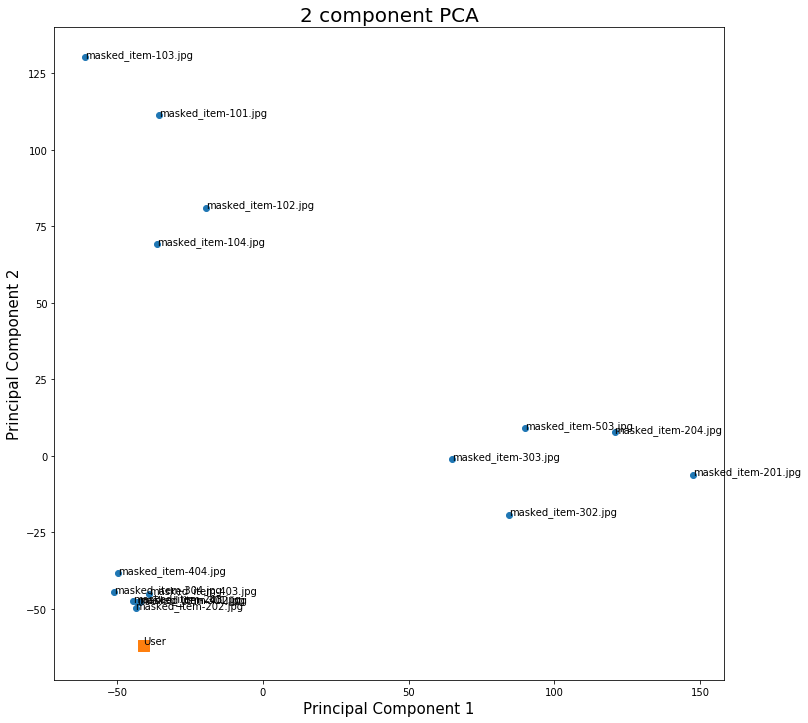

In [0]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf_withtest['principal component 1'],
           principalDf_withtest['principal component 2']
          )

xs, ys = principalDf_withtest.iloc[16][0], principalDf_withtest.iloc[16][1]
plt.scatter(xs,ys,s=121, marker="s")

labels = principalDf_withtest.index

for i, index in enumerate(labels):
    ax.annotate(index, (principalDf_withtest.iloc[i][0], principalDf_withtest.iloc[i][1]))

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

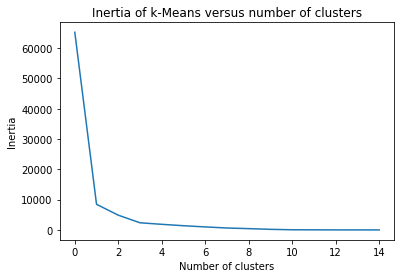

In [0]:
### Closest points to the User input


scores = [KMeans(n_clusters=i+2).fit(principalDf_withtest).inertia_ 
          for i in range(15)]
fig = plt.figure()
ax = plt.axes()


ax.plot(scores)

plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [0]:
## KDTree

from sklearn.neighbors import KDTree

tree = KDTree(principalDf_withtest, leaf_size=2)
ind = tree.query(principalDf_withtest[-1:], k=3, return_distance=False)
print(ind)  # indices of 3 closest neighbors
#print(dist)  # distances to 3 closest neighbors
print(principalDf_withtest.index[ind])

[[16  6  8]]
Index([['User', 'masked_item-202.jpg', 'masked_item-402.jpg']], dtype='object', name='name')


In [0]:
### Finding the parent images of the closest matched items
import re
name_image=[]
for i, index in enumerate(ind[0][1:]):
    
    print(principalDf_withtest.index[index])
    
    image='masked0'+str(re.search(r"(?<=0)[^.]+", principalDf_withtest.index[index]).group())+'.jpg'
    print(image)

masked_item-202.jpg
masked02.jpg
masked_item-402.jpg
masked02.jpg


In [0]:
import re
print(re.search(r"(?<=0)[^.]+", 'masked_item-202.jpg').group())

2


In [0]:
mf_test=pd.read_csv('mf_features_names_16.csv', index_col=False)
mf_test.set_index('name', drop=True, append=False, inplace=True)

In [0]:
mf_test

,1,2,3,4,5,6,7,8,9,10,...,51191,51192,51193,51194,51195,51196,51197,51198,51199,51200
name,,,,,,,,,,,,,,,,,,,,,
masked_item-101.jpg,0.234422,0.000000,1.748026,0.620096,0.000000,0.000000,0.0,0.0,0.822041,0.000000,...,0.294337,0.395623,0.000000,0.000000,0.000000,0.000000,0.000000,2.107985,1.101410,1.631217
masked_item-201.jpg,0.000000,0.000000,1.323125,0.000000,0.000000,1.099567,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.332609,0.691194,1.398327,1.517198,0.039111,0.000000,0.000000
masked_item-301.jpg,0.542710,0.000000,1.229383,0.045002,0.248592,0.000000,0.0,0.0,0.259325,0.000000,...,0.000000,2.165267,0.342934,1.738181,0.419735,0.000000,1.213607,0.000000,0.157842,0.118816
masked_item-403.jpg,0.506075,0.000000,1.230318,0.096645,0.161257,0.000000,0.0,0.0,0.209133,0.000000,...,0.000000,2.007596,0.651703,2.514235,0.630699,0.000000,1.454212,0.000000,0.509401,0.814658
masked_item-503.jpg,0.000000,0.000000,0.901073,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.188878,0.659365,0.000000,2.267030,0.297415,0.664253,0.000000,0.540801,0.000000,0.000000
masked_item-102.jpg,0.065777,0.000000,2.019639,0.465239,0.000000,0.000000,0.0,0.0,0.512211,0.000000,...,0.000000,0.606243,0.000000,0.000000,0.000000,0.000000,0.507838,1.093417,0.000000,0.000000
masked_item-202.jpg,0.449323,0.053422,1.356884,0.080267,0.122403,0.000000,0.0,0.0,0.425781,0.000000,...,0.000000,1.075602,0.391050,1.718072,0.893010,0.000000,0.912859,0.485803,0.525844,0.000000
masked_item-302.jpg,0.000000,0.000000,0.995878,0.000000,0.000000,0.162158,0.0,0.0,0.000000,0.000000,...,0.281373,0.446176,0.059155,1.527486,1.216925,0.541671,0.000000,0.221180,0.352695,0.000000
masked_item-402.jpg,0.532382,0.000000,1.166297,0.152533,0.210680,0.000000,0.0,0.0,0.244519,0.000000,...,0.000000,1.669714,0.530869,1.095429,1.429394,0.046476,0.797676,1.353366,1.718610,0.000000
